In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = (20,10)

In [102]:
df1 = pd.read_csv('PricePredictor.csv')
df1.head()

,location,size,total_sqft,bath,price,Place
0,Mahadevpura,3 BHK,1505,3.0,64.00,Bengaluru
1,Sultanpur Extension,1 bhk,445.0,2.0,16.50,Delhi
2,Kanakpura Road,3 BHK,1703,3.0,130.00,Bengaluru
3,Bagalakunte,1 Bedroom,700,1.0,162.00,Bengaluru
4,Sarjapur Road,2 BHK,1104,2.0,34.22,Bengaluru


In [103]:
df1.shape

(21688, 6)

In [104]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          80
price          0
Place          0
dtype: int64

In [105]:
df3 = df1.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
Place         0
dtype: int64

In [106]:
df3['size'].unique()

array(['3 BHK', '1 bhk', '1 Bedroom', '2 BHK', '5 Bedroom', '2 bhk',
       '3 bhk', '4 BHK', '1 BHK', '4 Bedroom', '4 bhk', '2 Bedroom',
       '8 BHK', '3 Bedroom', '6 Bedroom', '6 BHK', '5 bhk', '5 BHK',
       '9 Bedroom', '10 Bedroom', '7 Bedroom', '8 Bedroom', '1 RK',
       '10 bhk', '11 Bedroom', '13 BHK', '7 BHK', '6 bhk', '9 BHK',
       '11 BHK', '16 BHK', '27 BHK', '10 BHK', '7 bhk', '19 BHK',
       '12 Bedroom', '14 BHK', '43 Bedroom', ' bhk', '18 Bedroom'],
      dtype=object)

In [107]:
def get_bhk(x):
    try:
        return int(x.split(' ')[0])
    except:
        return None

# Apply the function to create a new column with the BHK value
df3['bhk'] = df3['size'].apply(get_bhk)

C:\Users\Anubhab\AppData\Local\Temp/ipykernel_11464/1109610341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(get_bhk)


In [108]:
df3.head()

,location,size,total_sqft,bath,price,Place,bhk
0,Mahadevpura,3 BHK,1505,3.0,64.00,Bengaluru,3.0
1,Sultanpur Extension,1 bhk,445.0,2.0,16.50,Delhi,1.0
2,Kanakpura Road,3 BHK,1703,3.0,130.00,Bengaluru,3.0
3,Bagalakunte,1 Bedroom,700,1.0,162.00,Bengaluru,1.0
4,Sarjapur Road,2 BHK,1104,2.0,34.22,Bengaluru,2.0


In [109]:
df3['bhk'].unique()

array([ 3.,  1.,  2.,  5.,  4.,  8.,  6.,  9., 10.,  7., 11., 13., 16.,
       27., 19., 12., 14., 43., nan, 18.])

In [110]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,Place,bhk
6062,2Electronic City Phase II,27 BHK,8000,27.0,230.0,Bengaluru,27.0
19791,Munnekollal,43 Bedroom,2400,40.0,660.0,Bengaluru,43.0


In [111]:
df3.total_sqft.unique()

array(['1505', '445.0', '1703', ..., '456', '1234.6', '340'], dtype=object)

In [112]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [113]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,Place,bhk
49,Tumkur Road,2 BHK,1076 - 1199,2.0,48.905,Bengaluru,2.0
168,Old Madras Road,5 BHK,4500 - 5540,7.0,287.000,Bengaluru,5.0
832,Harlur,4 BHK,2650 - 2990,4.0,153.500,Bengaluru,4.0
984,Harohalli,2 Bedroom,2.09Acres,2.0,200.000,Bengaluru,2.0
985,Rajapura,2 BHK,86.72Sq. Meter,2.0,40.000,Bengaluru,2.0
1007,Whitefield,4 BHK,2830 - 2882,5.0,154.500,Bengaluru,4.0
1258,Balagere,1 BHK,645 - 936,1.0,41.900,Bengaluru,1.0
1348,Panathur,3 BHK,1565 - 1595,3.0,71.890,Bengaluru,3.0
1434,JP Nagar,3 BHK,84.53Sq. Meter,3.0,69.340,Bengaluru,3.0
1596,Langford Town,4 BHK,697Sq. Meter,4.0,211.000,Bengaluru,4.0


In [114]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
                

In [115]:
convert_sqft_to_num('2166')

2166.0

In [116]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [117]:
convert_sqft_to_num('34.465Sq. Meter')

In [118]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,Place,bhk
0,Mahadevpura,3 BHK,1505.0,3.0,64.0,Bengaluru,3.0
1,Sultanpur Extension,1 bhk,445.0,2.0,16.5,Delhi,1.0
2,Kanakpura Road,3 BHK,1703.0,3.0,130.0,Bengaluru,3.0


In [119]:
df4.loc[30]

location      KK Nagar
size             2 bhk
total_sqft      1522.0
bath               1.0
price         134.5666
Place          Chennai
bhk                2.0
Name: 30, dtype: object

In [120]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,Place,bhk,price_per_sqft
0,Mahadevpura,3 BHK,1505.0,3.0,64.00,Bengaluru,3.0,4252.491694
1,Sultanpur Extension,1 bhk,445.0,2.0,16.50,Delhi,1.0,3707.865169
2,Kanakpura Road,3 BHK,1703.0,3.0,130.00,Bengaluru,3.0,7633.587786
3,Bagalakunte,1 Bedroom,700.0,1.0,162.00,Bengaluru,1.0,23142.857143
4,Sarjapur Road,2 BHK,1104.0,2.0,34.22,Bengaluru,2.0,3099.637681


In [121]:
len(df5.location.unique())

1686

In [122]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Chrompet                                1679
Karapakkam                              1363
KK Nagar                                 996
Velachery                                979
Anna Nagar                               781
                                        ... 
1 Giri Nagar                               1
Kenchanehalli R R Nagar                    1
Kengeri Satellite Town ( BDA SITE)         1
Kengeri Satellite Town KHB Apartment       1
whitefiled                                 1
Name: location, Length: 1675, dtype: int64

In [123]:
len(location_stats[location_stats<=10])

1400

In [124]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
The Leela Sky Villas, Patel Nagar       10
Naganathapura                           10
Dodsworth Layout                        10
Mahavir Enclave                         10
Vasant Kunj                             10
                                        ..
1 Giri Nagar                             1
Kenchanehalli R R Nagar                  1
Kengeri Satellite Town ( BDA SITE)       1
Kengeri Satellite Town KHB Apartment     1
whitefiled                               1
Name: location, Length: 1400, dtype: int64

In [125]:
len(df5.location.unique())

1675

In [126]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

276

In [127]:
df5.head(10)

,location,size,total_sqft,bath,price,Place,bhk,price_per_sqft
0,Mahadevpura,3 BHK,1505.0,3.0,64.0000,Bengaluru,3.0,4252.491694
1,other,1 bhk,445.0,2.0,16.5000,Delhi,1.0,3707.865169
2,Kanakpura Road,3 BHK,1703.0,3.0,130.0000,Bengaluru,3.0,7633.587786
3,other,1 Bedroom,700.0,1.0,162.0000,Bengaluru,1.0,23142.857143
4,Sarjapur Road,2 BHK,1104.0,2.0,34.2200,Bengaluru,2.0,3099.637681
5,Nagarbhavi,3 BHK,1350.0,2.0,54.6000,Bengaluru,3.0,4044.444444
6,Karapakkam,1 bhk,1112.0,1.0,99.2825,Chennai,1.0,8928.282374
7,other,2 BHK,1075.0,2.0,57.0000,Bengaluru,2.0,5302.325581
8,Vasanthapura,3 BHK,1400.0,3.0,60.0000,Bengaluru,3.0,4285.714286
9,Cox Town,3 BHK,1975.0,3.0,150.0000,Bengaluru,3.0,7594.936709


In [128]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,Place,bhk,price_per_sqft
65,CV Raman Nagar,4 Bedroom,1100.0,4.0,220.0,Bengaluru,4.0,20000.000000
92,other,5 Bedroom,600.0,3.0,86.0,Bengaluru,5.0,14333.333333
99,Vijayanagar,6 Bedroom,1230.0,4.0,210.0,Bengaluru,6.0,17073.170732
125,Rajaji Nagar,5 Bedroom,900.0,4.0,140.0,Bengaluru,5.0,15555.555556
142,Giri Nagar,6 BHK,1200.0,3.0,175.0,Bengaluru,6.0,14583.333333


In [129]:
df5.shape

(21607, 8)

In [130]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(20687, 8)

In [131]:
df6.price_per_sqft.describe()

count     20641.000000
mean       7343.091051
std        4277.077140
min         204.081633
25%        4774.823657
50%        6300.757576
75%        8571.428571
max      176470.588235
Name: price_per_sqft, dtype: float64

In [132]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(15611, 8)

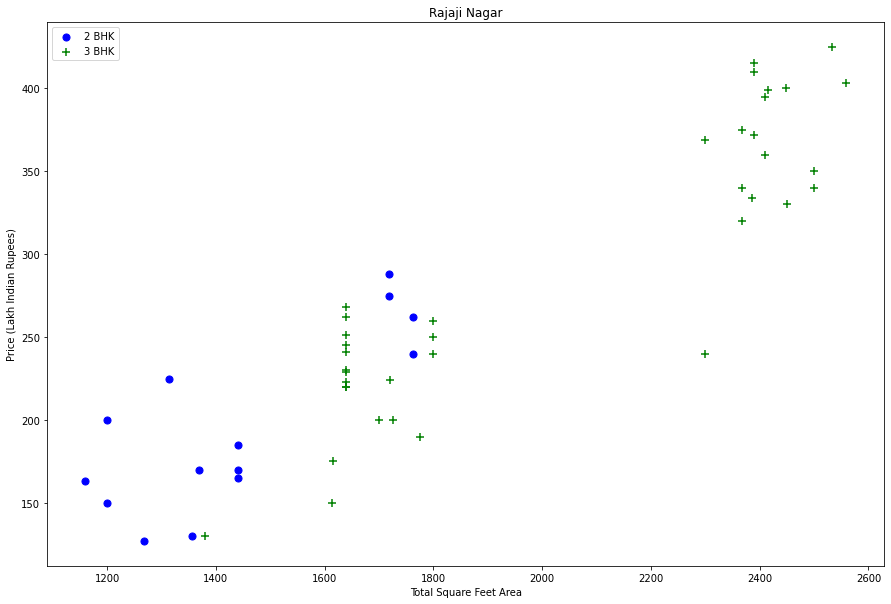

In [133]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

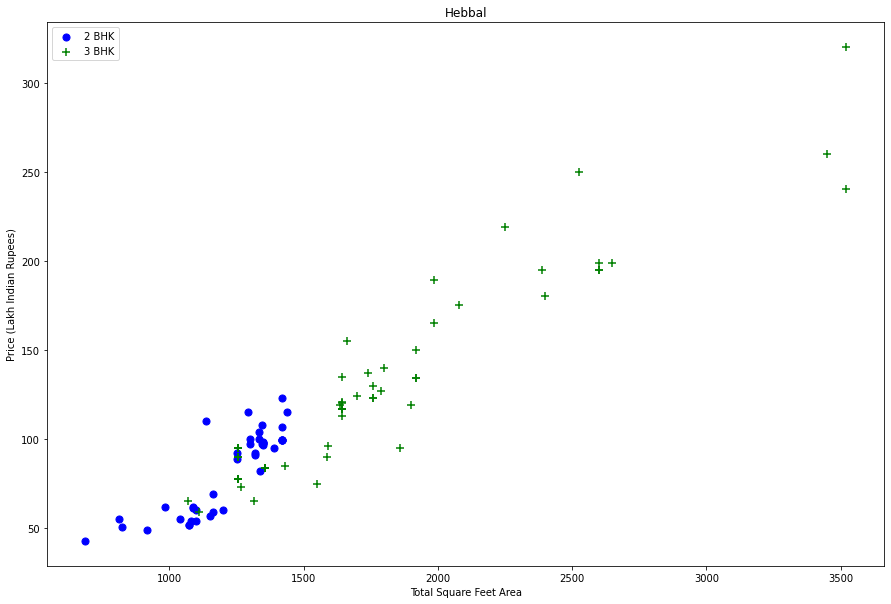

In [134]:
plot_scatter_chart(df7,"Hebbal")

In [139]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(11207, 8)

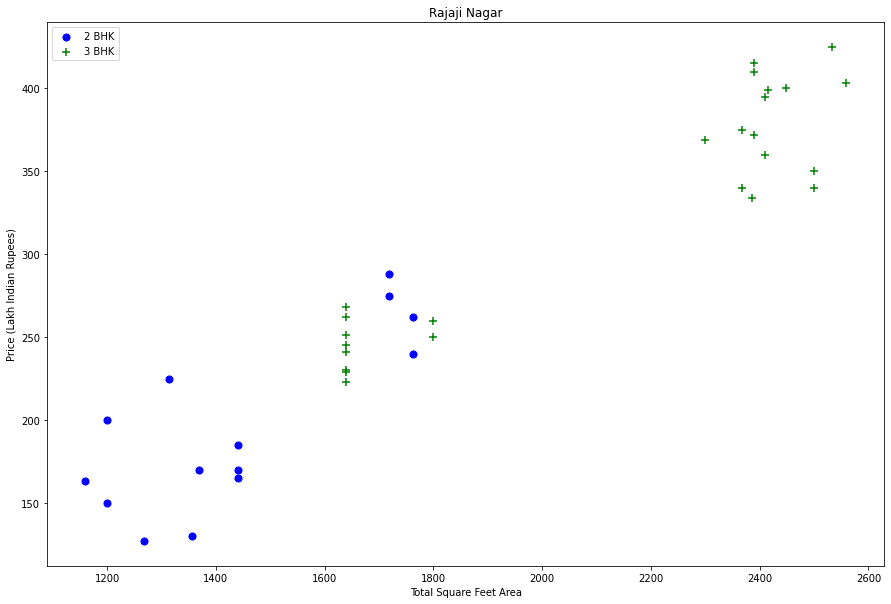

In [140]:
plot_scatter_chart(df8,"Rajaji Nagar")

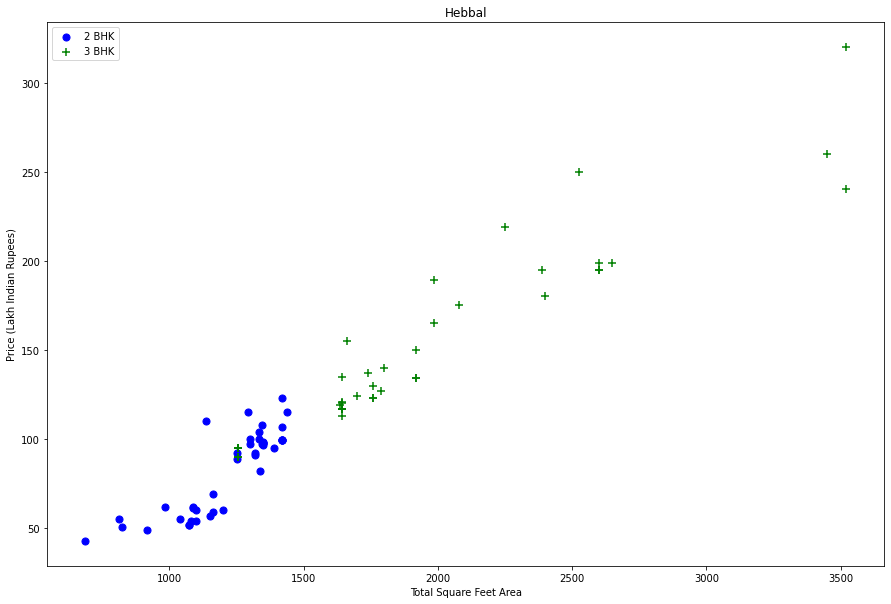

In [141]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

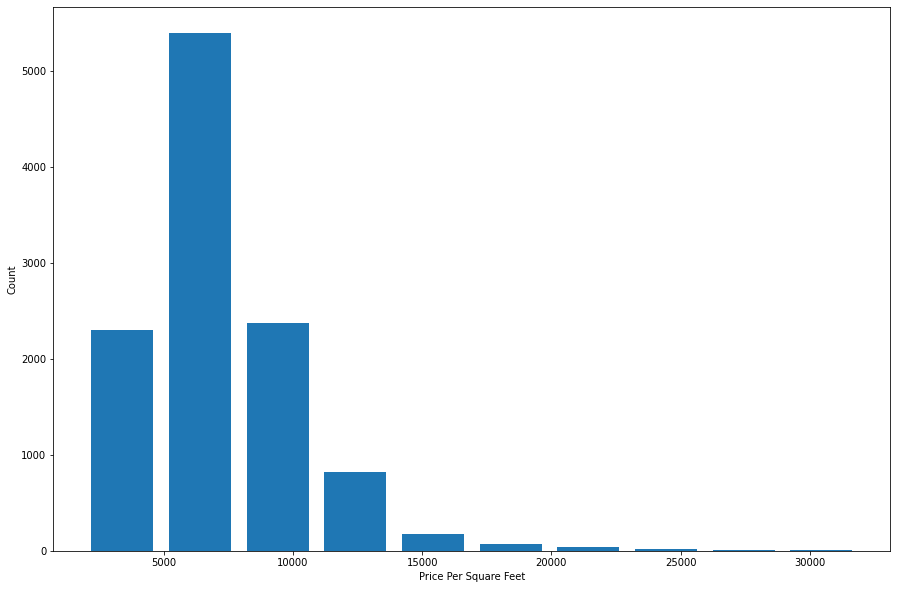

In [142]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [143]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  8.,  1.,  6.,  7.,  9., 12., 13., 16., 14.])

In [144]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,Place,bhk,price_per_sqft
9147,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,Bengaluru,10.0,4000.000000
12983,other,13 BHK,5425.0,13.0,275.0,Bengaluru,13.0,5069.124424
13562,other,16 BHK,10000.0,16.0,550.0,Bengaluru,16.0,5500.000000
14015,other,10 BHK,12000.0,12.0,525.0,Bengaluru,10.0,4375.000000
14658,other,11 BHK,6000.0,12.0,150.0,Bengaluru,11.0,2500.000000
15201,other,9 Bedroom,3300.0,14.0,500.0,Bengaluru,9.0,15151.515152


Text(0, 0.5, 'Count')

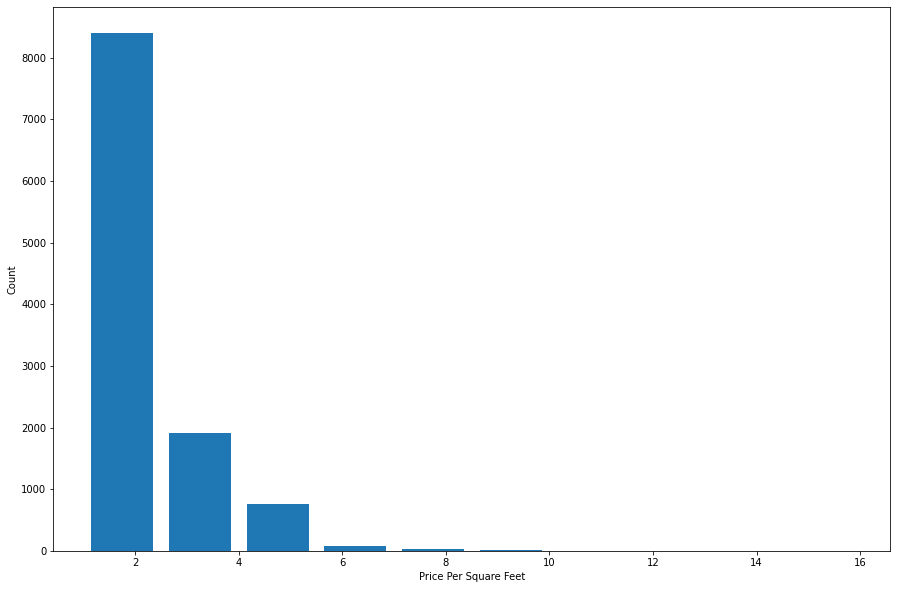

In [145]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [146]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,Place,bhk,price_per_sqft
2641,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,Bengaluru,4.0,3252.032520
9108,Nagasandra,4 Bedroom,7000.0,8.0,450.0,Bengaluru,4.0,6428.571429
10916,Thanisandra,3 BHK,1806.0,6.0,116.0,Bengaluru,3.0,6423.034330
13163,other,6 BHK,11338.0,9.0,1000.0,Bengaluru,6.0,8819.897689
15201,other,9 Bedroom,3300.0,14.0,500.0,Bengaluru,9.0,15151.515152


In [147]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(11126, 8)

In [148]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,Place,bhk
0,1st Block Jayanagar,1235.0,2.0,148.0,Bengaluru,2.0
1,1st Block Jayanagar,1200.0,2.0,130.0,Bengaluru,3.0
2,1st Block Jayanagar,2450.0,4.0,368.0,Bengaluru,4.0
3,1st Block Jayanagar,2750.0,4.0,413.0,Bengaluru,4.0
4,1st Block Jayanagar,1630.0,3.0,194.0,Bengaluru,3.0


In [149]:
df10.shape

(11126, 6)

In [150]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Yamuna Vihar, Shahdara",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(5)

,location,total_sqft,bath,price,Place,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Yamuna Vihar, Shahdara",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1235.0,2.0,148.0,Bengaluru,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1200.0,2.0,130.0,Bengaluru,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2450.0,4.0,368.0,Bengaluru,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2750.0,4.0,413.0,Bengaluru,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1630.0,3.0,194.0,Bengaluru,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df12 = df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,price,Place,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Yamuna Vihar, Shahdara",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,148.0,Bengaluru,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,130.0,Bengaluru,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2450.0,4.0,368.0,Bengaluru,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2750.0,4.0,413.0,Bengaluru,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1630.0,3.0,194.0,Bengaluru,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
x = df12.drop(['price','Place'],axis='columns')
x.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Yamuna Vihar, Shahdara",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2450.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2750.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
y = df12.price
y.head()

0    148.0
1    130.0
2    368.0
3    413.0
4    194.0
Name: price, dtype: float64

TRAINING AND TESTING MODEL

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [162]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8639772692057679

In [163]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.85602313, 0.80755048, 0.86121157, 0.86765781, 0.8560243 ])

In [164]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous 

,model,best_score,best_params
0,linear_regression,0.849693,{'normalize': False}
1,lasso,0.623923,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.696853,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [193]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    arr = np.zeros(len(x.columns))
    arr[0] = sqft
    arr[1] = bath
    arr[2] = bhk
    if loc_index >= 0:
        arr[loc_index] = 1

    return lr_clf.predict([arr])[0]

In [194]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.80288347852803

In [168]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.45796364134415

In [169]:
predict_price('Indira Nagar',1000, 2, 2)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


177.56473756019557

In [170]:
predict_price('Indira Nagar',1000, 3, 3)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


178.2198177230117

In [174]:
predict_price('Karapakkam',1000, 3, 3)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.2640470677168

In [177]:
predict_price('Shivaji Nagar',1000, 3, 3)

c:\users\anubhab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.71646050647018

In [172]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [173]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("col.json","w") as f:
    f.write(json.dumps(columns))